In [2]:
install.packages('dplyr')
install.packages('ggplot2')
install.packages('lme4')
install.packages('ggeffects')
install.packages('tidyr')
install.packages('broom')


The downloaded binary packages are in
	/var/folders/ws/dmbkn8cx75l33lp2zph5rpbw0000gn/T//Rtmp0UdkK1/downloaded_packages

The downloaded binary packages are in
	/var/folders/ws/dmbkn8cx75l33lp2zph5rpbw0000gn/T//Rtmp0UdkK1/downloaded_packages

The downloaded binary packages are in
	/var/folders/ws/dmbkn8cx75l33lp2zph5rpbw0000gn/T//Rtmp0UdkK1/downloaded_packages

The downloaded binary packages are in
	/var/folders/ws/dmbkn8cx75l33lp2zph5rpbw0000gn/T//Rtmp0UdkK1/downloaded_packages

The downloaded binary packages are in
	/var/folders/ws/dmbkn8cx75l33lp2zph5rpbw0000gn/T//Rtmp0UdkK1/downloaded_packages


also installing the dependency ‘backports’





The downloaded binary packages are in
	/var/folders/ws/dmbkn8cx75l33lp2zph5rpbw0000gn/T//Rtmp0UdkK1/downloaded_packages


In [3]:
library(dplyr)
library(ggplot2)
library(lme4)
library(ggeffects)
library(tidyr)
library(broom)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: Matrix


Attaching package: ‘tidyr’


The following objects are masked from ‘package:Matrix’:

    expand, pack, unpack




In [5]:
vf = read.csv('final_vf.csv')

In [8]:
vf_i = subset(vf, Trial == 'I')
vf_c = subset(vf, Trial == 'C')

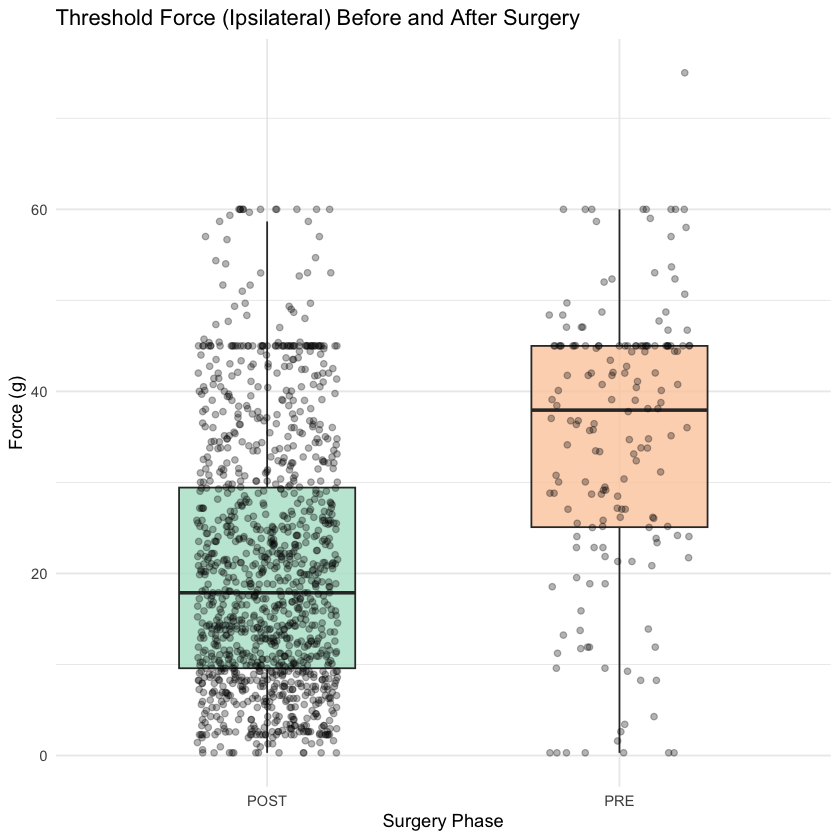

In [9]:
ggplot(vf_i,aes(x = Stage, y = Force, fill= Stage))+
      geom_boxplot(width = 0.5, alpha = 0.8, outlier.shape = NA)+ 
      geom_jitter(width = 0.2, alpha = 0.3, color = 'Black' )+ 
      labs (
          title = 'Threshold Force (Ipsilateral) Before and After Surgery', 
          x = 'Surgery Phase', 
          y = 'Force (g)'
      )+ 
theme_minimal() +
  scale_fill_brewer(palette = "Pastel2") +
  theme(legend.position = "none")

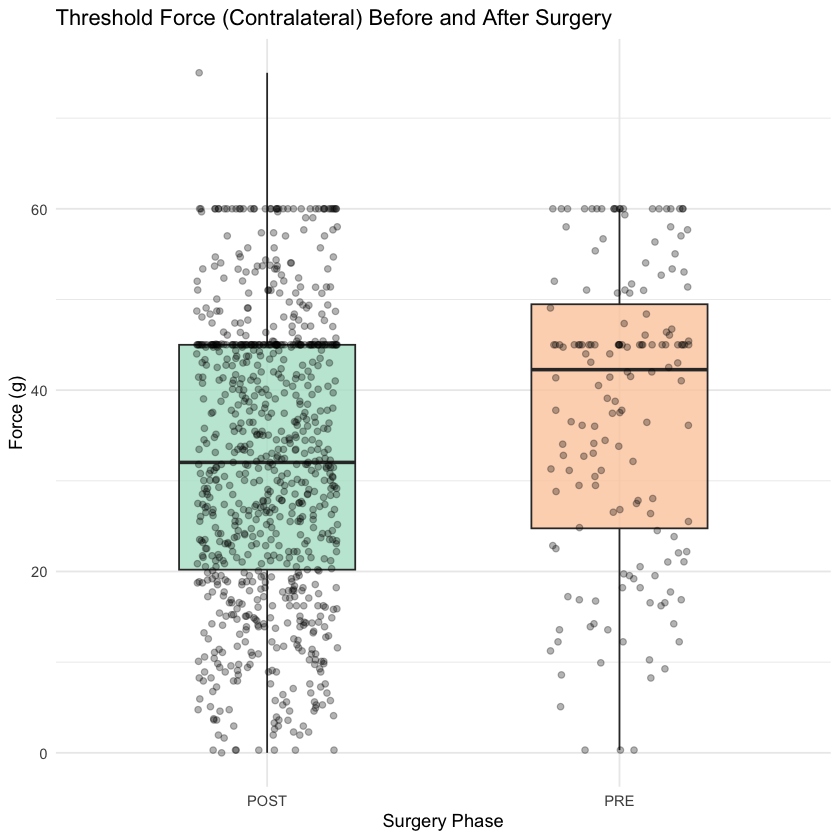

In [10]:
ggplot(vf_c,aes(x = Stage, y = Force, fill= Stage))+
      geom_boxplot(width = 0.5, alpha = 0.8, outlier.shape = NA)+ 
      geom_jitter(width = 0.2, alpha = 0.3, color = 'Black' )+ 
      labs (
          title = 'Threshold Force (Contralateral) Before and After Surgery', 
          x = 'Surgery Phase', 
          y = 'Force (g)'
      )+ 
theme_minimal() +
  scale_fill_brewer(palette = "Pastel2") +
  theme(legend.position = "none")

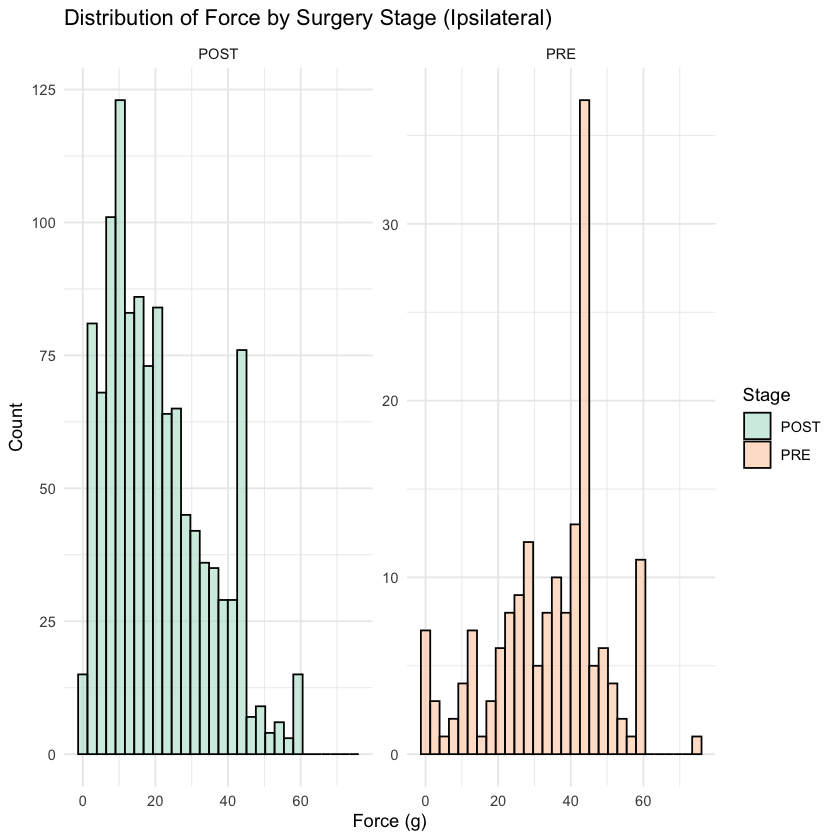

In [13]:
# check the distribution of the dataset to pick the correct statistical tests

library(ggplot2)

ggplot(vf_i, aes(x = Force, fill = Stage)) +
  geom_histogram(alpha = 0.6, bins = 30, color = "black") +
  facet_wrap(~ Stage, scales = "free_y") +
  theme_minimal() +
  labs(
    title = "Distribution of Force by Surgery Stage (Ipsilateral)",
    x = "Force (g)",
    y = "Count"
  ) +
  scale_fill_brewer(palette = "Pastel2")

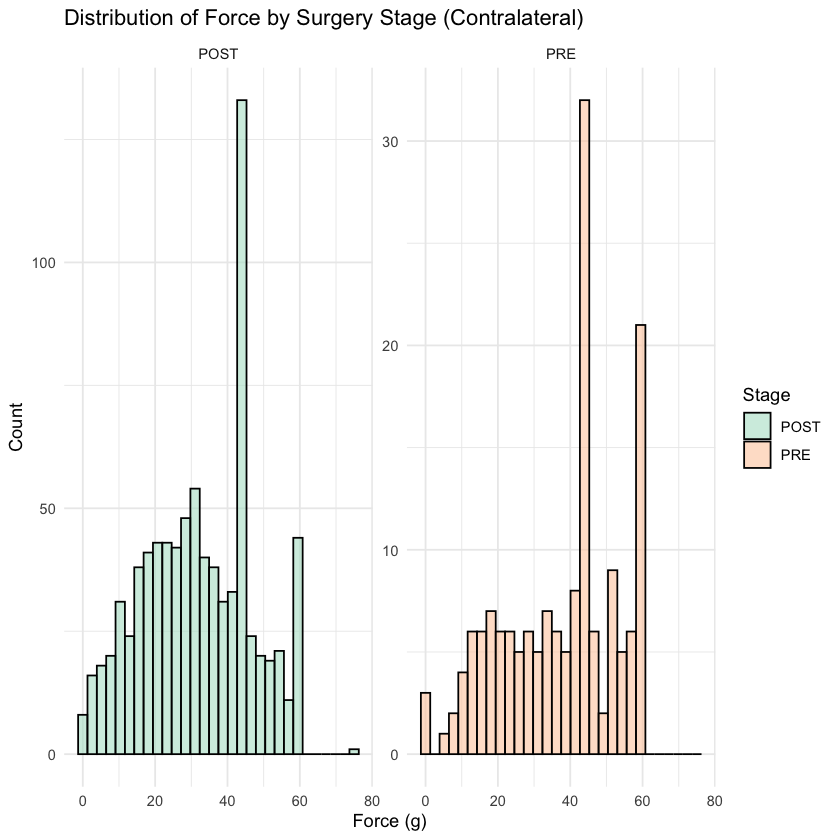

In [14]:
library(ggplot2)

ggplot(vf_c, aes(x = Force, fill = Stage)) +
  geom_histogram(alpha = 0.6, bins = 30, color = "black") +
  facet_wrap(~ Stage, scales = "free_y") +
  theme_minimal() +
  labs(
    title = "Distribution of Force by Surgery Stage (Contralateral)",
    x = "Force (g)",
    y = "Count"
  ) +
  scale_fill_brewer(palette = "Pastel2")

In [21]:
# reshape dataset to apply a paired test 
# compute median force for each rat pre and post surgery 
vf_i_wide = vf_i%>%
group_by(ID, Stage) %>%
  summarise(MedianForce = median(Force, na.rm = TRUE), .groups = "drop") %>%
pivot_wider(
    names_from = Stage, 
    values_from = MedianForce
)

In [22]:
vf_i_wide

ID,POST,PRE
<chr>,<dbl>,<dbl>
DW 239,12.070,25.690
DW 240,22.550,45.000
DW 241,25.545,42.010
DW 24X,27.540,45.000
DW 270,39.010,45.000
DW 282,14.910,29.720
DW 283,25.840,44.695
DW 284,NA,30.380
DW 288,21.530,57.010


In [23]:
# apply statistical test (Wilcoxon signed-rank test)
wilcox.test(vf_i_wide$PRE, vf_i_wide$POST, paired =TRUE)


	Wilcoxon signed rank exact test

data:  vf_i_wide$PRE and vf_i_wide$POST
V = 120, p-value = 6.104e-05
alternative hypothesis: true location shift is not equal to 0


In [26]:
#repeat for contralateral side 
vf_c_wide = vf_c%>%
group_by(ID, Stage) %>%
  summarise(MedianForce = median(Force, na.rm = TRUE), .groups = "drop") %>%
pivot_wider(
    names_from = Stage, 
    values_from = MedianForce
)

In [27]:
#repeat for contralateral side 
wilcox.test(vf_c_wide$PRE, vf_c_wide$POST, paired = TRUE)


	Wilcoxon signed rank exact test

data:  vf_c_wide$PRE and vf_c_wide$POST
V = 100, p-value = 0.02155
alternative hypothesis: true location shift is not equal to 0


# spaghetti plots 

In [37]:
vfi_median_per_rat <- vf_i %>%
  group_by(ID, Stage) %>%
  summarise(MedianForce = median(Force, na.rm = TRUE), .groups = "drop")


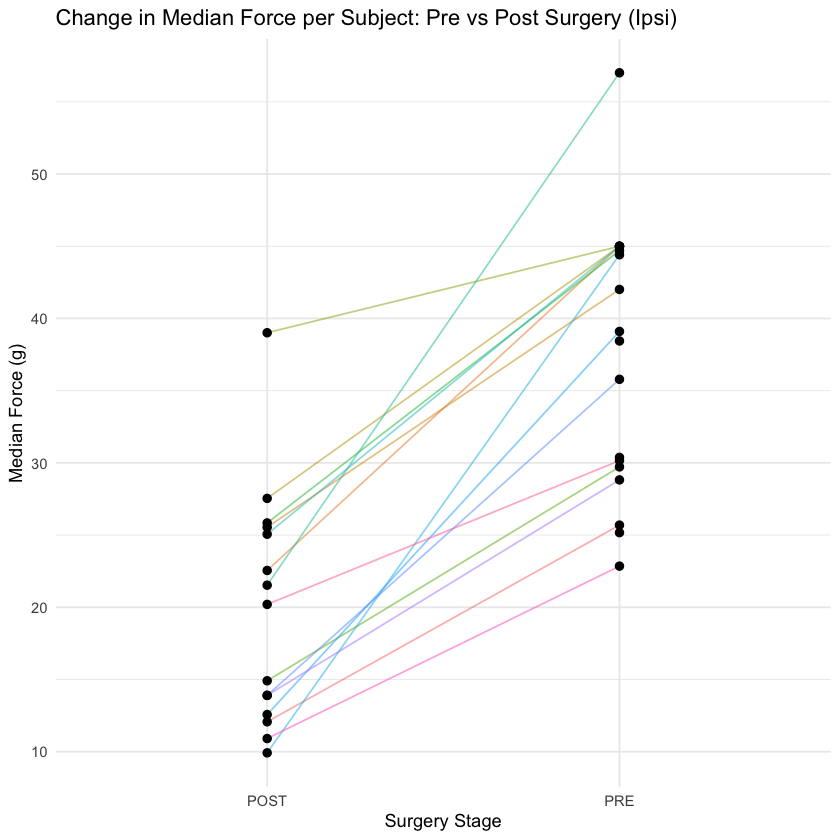

In [39]:
ggplot(vfi_median_per_rat, aes(x = Stage, y = MedianForce, group = ID)) +
  geom_line(aes(color = ID), alpha = 0.5) +
  geom_point(size = 2) +
  labs(
    title = "Change in Median Force per Subject: Pre vs Post Surgery (Ipsi)",
    x = "Surgery Stage",
    y = "Median Force (g)"
  ) +
  theme_minimal() +
  theme(legend.position = "none")

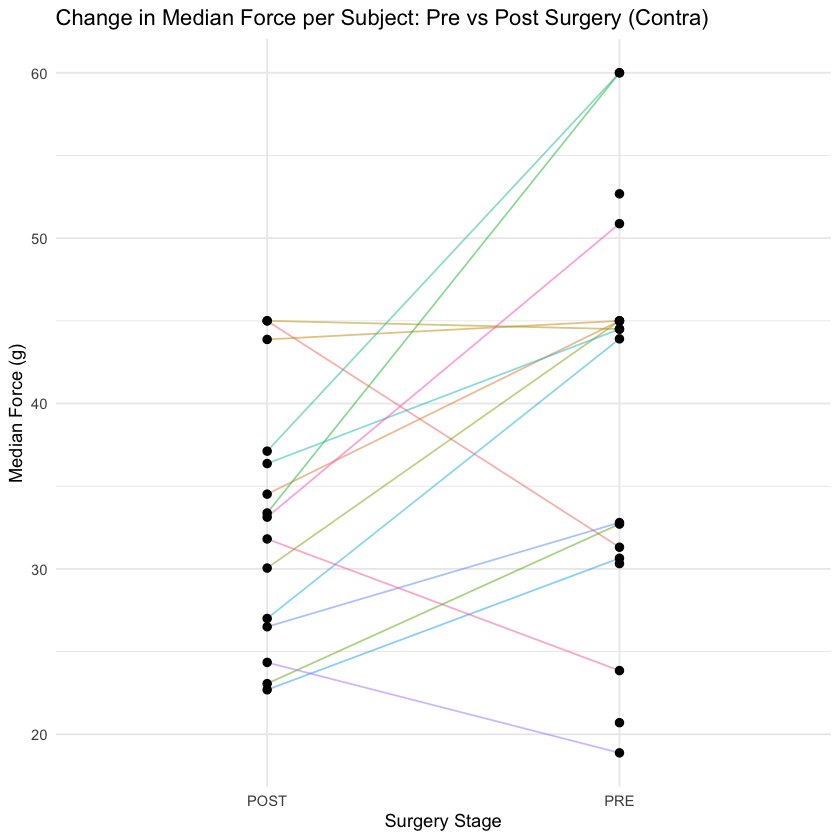

In [40]:
#repeat for contralateral side 
vfc_median_per_rat <- vf_c %>%
  group_by(ID, Stage) %>%
  summarise(MedianForce = median(Force, na.rm = TRUE), .groups = "drop")

ggplot(vfc_median_per_rat, aes(x = Stage, y = MedianForce, group = ID)) +
  geom_line(aes(color = ID), alpha = 0.5) +
  geom_point(size = 2) +
  labs(
    title = "Change in Median Force per Subject: Pre vs Post Surgery (Contra)",
    x = "Surgery Stage",
    y = "Median Force (g)"
  ) +
  theme_minimal() +
  theme(legend.position = "none")

# Apply the Linear Mixed- Effects Model 

In [41]:
# standardizing day number for better convergence of the lme models 
vf$DayNumber_z = scale(vf$DayNumber)

In [42]:
# creating multiple models 
m1 = lmer (Force ~ DayNumber_z + (DayNumber_z| ID), data = vf)
m2 = lmer (Force ~ DayNumber_z * Trial + (DayNumber_z |ID), data = vf)

In [43]:
#comparing nested models to find one that fits the data best 
anova(m1,m2)

refitting model(s) with ML (instead of REML)



,npar,AIC,BIC,logLik,-2*log(L),Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
m1,6,19479.51,19514.10,-9733.755,19467.51,NA,NA,NA
m2,8,19199.42,19245.55,-9591.711,19183.42,284.0891,2,2.045683e-62


In [44]:
summary(m2)

Linear mixed model fit by REML ['lmerMod']
Formula: Force ~ DayNumber_z * Trial + (DayNumber_z | ID)
   Data: vf

REML criterion at convergence: 19179

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.6076 -0.7496 -0.0673  0.6920  3.8242 

Random effects:
 Groups   Name        Variance Std.Dev. Corr 
 ID       (Intercept)  25.846   5.084        
          DayNumber_z   5.898   2.428   -0.74
 Residual             194.662  13.952        
Number of obs: 2358, groups:  ID, 18

Fixed effects:
                   Estimate Std. Error t value
(Intercept)         33.4750     1.3000  25.750
DayNumber_z         -1.7795     0.7343  -2.423
TrialI             -10.0487     0.5904 -17.020
DayNumber_z:TrialI  -1.8118     0.5802  -3.123

Correlation of Fixed Effects:
            (Intr) DyNmb_ TrialI
DayNumber_z -0.497              
TrialI      -0.247  0.011       
DyNmbr_z:TI  0.004 -0.412 -0.019

# Model-predicted withdrawal force trajectories 

In [45]:
# extract mean and SD to backtransform standardized day number to actual day number 
day_mean = mean(vf$DayNumber, na.rm = TRUE)
day_sd = sd(vf$DayNumber, na.rm = FALSE)

In [46]:
# get model predictions for both sides 
pred = ggpredict(m2, terms = c('DayNumber_z', 'Trial'))

In [47]:
# convert standardized day to day 
pred$DayNumber = pred$x * day_sd + day_mean

In [48]:
#individual trajectories 
indiv_lines = vf %>%
  group_by(ID, Trial) %>%
  do({
    mod = lm(Force ~ DayNumber, data = .)
    data.frame(
      DayNumber = seq(min(.$DayNumber), max(.$DayNumber), length.out = 2),  # just endpoints
      Force = predict(mod, newdata = data.frame(DayNumber = seq(min(.$DayNumber), max(.$DayNumber), length.out = 2)))
    )
  })

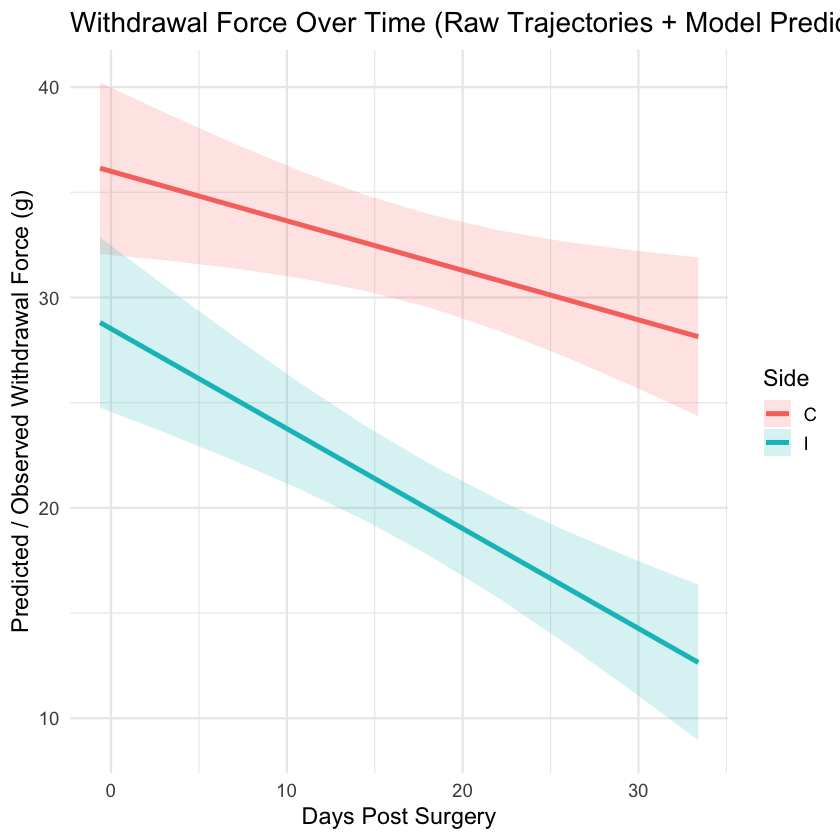

In [49]:
#population-level prediction overlayed on individual trajectories 
ggplot() +
  # Population CI ribbons
  geom_ribbon(
    data = pred,
    aes(x = DayNumber, ymin = conf.low, ymax = conf.high, fill = group),
    alpha = 0.18, color = NA
  ) +
  # Population lines
  geom_line(
    data = pred,
    aes(x = DayNumber, y = predicted, color = group),
    linewidth = 1.4
  ) +
  labs(
    title = "Withdrawal Force Over Time (Raw Trajectories + Model Predictions)",
    x = "Days Post Surgery",
    y = "Predicted / Observed Withdrawal Force (g)",
    color = "Side",
    fill  = "Side"
  ) +
  theme_minimal(base_size = 14)

In [50]:
ind_preds <- vf %>%
  distinct(ID, Trial) %>%                 # one row per rat per side
  group_by(ID, Trial) %>%
  do({
    DayNumber_z_seq <- seq(min(vf$DayNumber_z, na.rm = TRUE),
                           max(vf$DayNumber_z, na.rm = TRUE),
                           length.out = 100)
    data.frame(
      ID = .$ID[1],
      Trial = .$Trial[1],
      DayNumber_z = DayNumber_z_seq,
      DayNumber   = DayNumber_z_seq * day_sd + day_mean,
      pred = predict(
        m2,
        newdata = data.frame(
          DayNumber_z = DayNumber_z_seq,
          ID = .$ID[1],
          Trial = .$Trial[1]              
        )
        
      )
    )
  }) %>%
  ungroup()

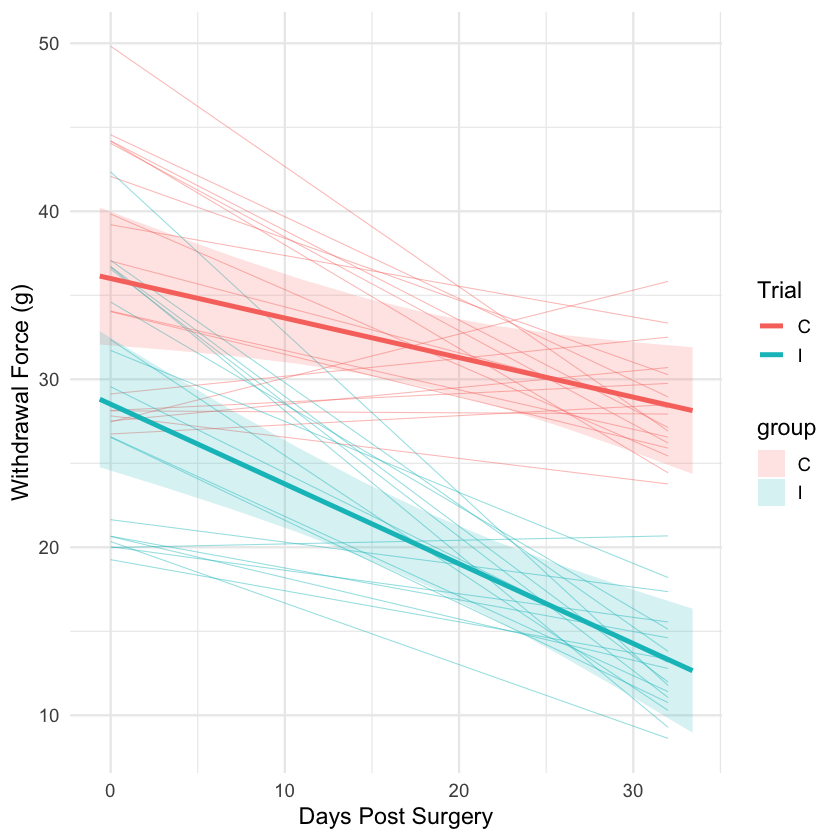

In [51]:
ggplot() +
  geom_line(data = ind_preds,
            aes(x = DayNumber, y = pred,
                group = interaction(ID, Trial), color = Trial),
            alpha = 0.45, linewidth = 0.3) +
# Population CI ribbons
  geom_ribbon(
    data = pred,
    aes(x = DayNumber, ymin = conf.low, ymax = conf.high, fill = group),
    alpha = 0.18, color = NA
  ) +
  # Population lines
  geom_line(
    data = pred,
    aes(x = DayNumber, y = predicted, color = group),
    linewidth = 1.4
  ) +
  labs(x = "Days Post Surgery", y = "Withdrawal Force (g)")+
  theme_minimal(base_size = 14)